# LEAD SCORING CASE STUDY

Problem Statement : An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion. X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%

Our Goals of the Case Study:

1)To build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.

2)To adjust to if the company's requirement changes in the future so you will need to handle these as well

## 1)IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 2)DATA INSPECTION

In [3]:
leads=pd.read_csv("leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
#Checking the shape of data
leads.shape

(9240, 37)

In [6]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [200]:
#checking the sum of null values
leads.isnull().sum()

Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Lead Origin_Landing Page Submission              0
                                                ..
Last Notable Activity_Modified                   0
Last Notable Activity_Olark Chat Conversation    0
Last Notable Activity_Others                     0
Last Notable Activity_Page Visited on Website    0
Last Notable Activity_SMS Sent                   0
Length: 64, dtype: int64

In [8]:
100*(leads.isnull().sum())/len(leads)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

## 3)DATA CLEANING AND PREPARATION 

In [9]:
#checking the tags column
leads.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [10]:
#checking the "what is your current occupation" column
leads["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [11]:
#checking the "how did you hear about x education" column
leads["How did you hear about X Education"].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [12]:
#checking "specialization" column
leads.Specialization.value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

###### lets check for those columns which have high data imbalance

In [13]:
leads["What matters most to you in choosing a course"].value_counts() 

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [14]:
leads.Magazine.value_counts()

No    9240
Name: Magazine, dtype: int64

In [15]:
leads["X Education Forums"].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [16]:
leads["Digital Advertisement"].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [17]:
leads["Search"].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [18]:
leads["Newspaper"].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [19]:
#checking city column
leads.City.value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [20]:
#we saw earlier that few columns had high number of null values. Therfore , we will be dropping those columns which have null values 45% or higher
leads.drop([ 'Lead Quality',  'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis = 1, inplace = True)
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [21]:
leads.TotalVisits.describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

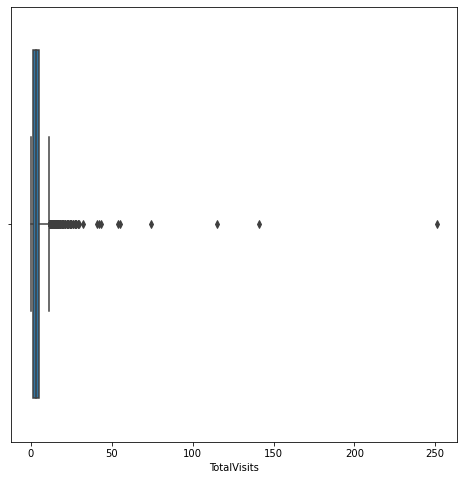

In [22]:
#checking the outliers using box plot
plt.figure(figsize=[8,8])
sns.boxplot(leads["TotalVisits"])
plt.show()

In [23]:
#since the "Totalvisits" have outliers , we are imputing then using median
leads["TotalVisits"]=leads["TotalVisits"].fillna(leads["TotalVisits"].median())


In [24]:
#checking if the above code worked or not
leads["TotalVisits"].isnull().sum()

0

In [25]:
#we noticed earlier that some columns had high data imbalance, so we will be dropping those columns.
leads.drop(["Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement"],axis=1,inplace=True)
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [26]:
#we noticed that some columns had "select" as their values.So we will be replacing them with "NaN" 
null_col = ['Specialization', 'Lead Source', 'Lead Profile', 'City']


leads[null_col] = leads[null_col].replace('Select',np.NaN)



In [27]:
#checking if the above code works
leads.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [28]:
#dropping 'prospect id' and 'lead number' as they are of no use
leads.drop(['Prospect ID', 'Lead Number'],axis=1, inplace = True)
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [29]:
#we noticed earlier that how 'tags' column had many variables and data is also imbalanced. Therefore , we group certain values into a group called 'others'
leads.loc[(leads.Tags == 'invalid number')|(leads.Tags == 'opp hangup')|(leads.Tags =="Diploma holder (Not Eligible)")| (leads.Tags == 'wrong number given')|(leads.Tags=="number not provided")|(leads.Tags=='in touch with EINS')|(leads.Tags=="Lost to Others")                                          
|(leads.Tags=="Want to take admission but has financial problems")|       
(leads.Tags=="Still Thinking")|                                          
(leads.Tags=="In confusion whether part time or DLP")|                   
(leads.Tags=="Interested in Next batch")|                                
(leads.Tags=="Lateral student")|                                         
(leads.Tags=="University not recognized")|                               
(leads.Tags=="Shall take in the next coming month")|                     
(leads.Tags=="Recognition issue (DEC approval)") ,'Tags'] = 'Others'




In [30]:
#checking for tags column again
leads.Tags.value_counts()

Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Others                                  302
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
Name: Tags, dtype: int64

In [31]:
#we notice that in the city column few variables have low values. Therefore,we will group them into two groups.
leads.loc[(leads.City == 'Thane & Outskirts') | (leads.City == 'Other Cities of Maharashtra'), 
       'City'] = 'Maharashtra Cities'
leads.loc[(leads.City == 'Other Cities') | (leads.City == 'Other Metro Cities') | (leads.City == 'Tier II Cities') , 
       'City'] = 'Non-Maharashtra Cities'

In [32]:
#checking for the 'city' column again
leads.City.value_counts()

Mumbai                    3222
Maharashtra Cities        1209
Non-Maharashtra Cities    1140
Name: City, dtype: int64

In [33]:
#checking for percentage of null values again
100*(leads.isnull().sum())/len(leads)

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Tags                                             36.2878

In [34]:
#we notice that lead has the highest number of null values,so we check the column
leads["Lead Profile"].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [35]:
#we will drop columns that have either high null values or will be of no use to us
leads.drop(["Lead Profile","I agree to pay the amount through cheque","A free copy of Mastering The Interview"],axis=1,inplace=True)
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [36]:
#checking the 'lead origin' column
leads["Lead Origin"].value_counts(normalize=True)*100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

In [37]:
#we notice that some variables had less values, so we will group them into 'others'
leads.loc[(leads['Lead Origin'] =='Lead Add Form') | (leads['Lead Origin'] == 'Lead Import') | (leads['Lead Origin']== 'Quick Add Form') , 
       'Lead Origin'] = 'Others'

In [38]:
#checking the 'lead origin' column again
leads['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Others                      774
Name: Lead Origin, dtype: int64

In [39]:
#checking the 'lead source' column again
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
welearnblog_Home        1
testone                 1
WeLearn                 1
Pay per Click Ads       1
youtubechannel          1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [40]:
#earlier we had noticed that 'lead source' has null values. Since the percentage of null values is less , we can impute them by using mode.
leads["Lead Source"]=leads["Lead Source"].fillna(leads["Lead Source"].mode()[0])

In [41]:
#checking for null values again
leads['Lead Source'].isnull().sum()

0

In [42]:
#we noticed earlier that "lead source" column had lot of variable which had low value count. Therefore, we will group them into "others".
leads.loc[(leads['Lead Source']=='Welingak Website')|      
(leads['Lead Source']=='Referral Sites')|        
(leads['Lead Source']=='Facebook')|              
(leads['Lead Source']=='bing')|                   
(leads['Lead Source']=='google')|                  
(leads['Lead Source']=='Click2call')|              
(leads['Lead Source']=='Press_Release')|           
(leads['Lead Source']=='Live Chat')|               
(leads['Lead Source']=='Social Media')|            
(leads['Lead Source']=='WeLearn')|                 
(leads['Lead Source']=='welearnblog_Home')|        
(leads['Lead Source']=='Pay per Click Ads')|       
(leads['Lead Source']=='NC_EDM')|                  
(leads['Lead Source']=='testone')|                 
(leads['Lead Source']=='blog')|                    
(leads['Lead Source']=='youtubechannel'),"Lead Source"]="Others"

In [43]:
#checking the 'lead source' column again.
leads['Lead Source'].value_counts()

Google            2904
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Others             350
Name: Lead Source, dtype: int64

In [44]:
#checking 'do not email' column
leads['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [45]:
#checking 'do not call' columns
leads['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

###### Checking the numerical columns

In [46]:
leads['Total Time Spent on Website'].head()

0       0
1     674
2    1532
3     305
4    1428
Name: Total Time Spent on Website, dtype: int64

In [47]:
leads['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [48]:
leads['Page Views Per Visit'].head()

0    0.0
1    2.5
2    2.0
3    1.0
4    1.0
Name: Page Views Per Visit, dtype: float64

In [49]:
leads['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

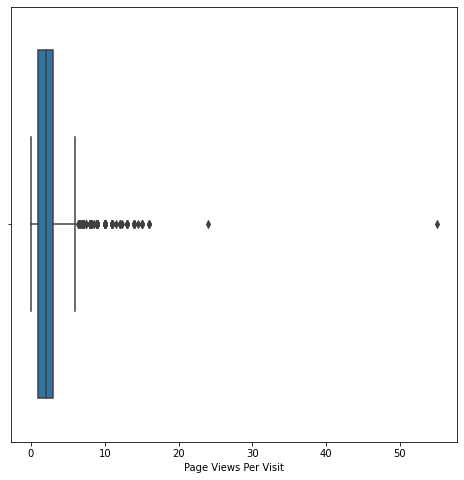

In [50]:
#checking for the outliers in 'page views per visit'
plt.figure(figsize=[8,8])
sns.boxplot(leads["Page Views Per Visit"])
plt.show()

In [51]:
#since 'page views per visit' has outliers,we will impute the missing values using mode
leads["Page Views Per Visit"]=leads["Page Views Per Visit"].fillna(leads["Page Views Per Visit"].median())
leads['Page Views Per Visit'].isnull().sum()

0

In [52]:
#checking the 'last activity' column
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [53]:
#We notice that 'last activity' columns has lot of variables with low value count.Therefore,we will group them into 'others'.
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [54]:
#checking 'last activity' column again
leads['Last Activity'].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [55]:
#checking for the country column
leads.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Kuwait                     4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Ghana                      2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
Belgium                    2
China                      2
Philippines                2
Kenya                      1
Indonesia                  1
Malaysia                   1
Russia                     1
Tanzania                   1
Denmark                    1
Liberia       

In [56]:
#we will drop the 'contry' column since it has high data imbalance
leads.drop(["Country"],axis=1,inplace=True)
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 5860 

In [57]:
#checking for null values in 'city' column
(leads.City.isnull().sum()/len(leads))*100

39.70779220779221

In [58]:
#checking for null values in 'last activity' column
(leads['Last Activity'].isnull().sum()/len(leads))*100

1.1147186147186148

In [59]:
#since the amount of null values is less, we can impute them with mode.
leads["Last Activity"]=leads["Last Activity"].fillna(leads["Last Activity"].mode()[0])
leads['Last Activity'].isnull().sum()

0

In [60]:
#checking for null percentage in 'what is your current occupation'
(leads["What is your current occupation"].isnull().sum()/len(leads))*100

29.11255411255411

In [61]:
#we notice that this column has little high % of null values and also they cannot be imputed,so we will drop the null rows
leads = leads[~pd.isnull(leads['What is your current occupation'])]

In [62]:
#checking the shape of data after dropping the rows
leads.shape

(6550, 20)

In [63]:
#checking whether any columns with null values are remaining
100*(leads.isnull().sum()/len(leads))

Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.000000
Last Activity                                     0.000000
Specialization                                   29.725191
How did you hear about X Education                0.290076
What is your current occupation                   0.000000
What matters most to you in choosing a course     0.290076
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Tags                                             11.358779
Update me on Supply Chain Content                 0.0000

In [64]:
#we had noticed earlier that this column had high data imbalance, therefore we will drop the column
leads.drop(["What matters most to you in choosing a course"],axis=1,inplace=True)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6550 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6550 non-null   object 
 1   Lead Source                             6550 non-null   object 
 2   Do Not Email                            6550 non-null   object 
 3   Do Not Call                             6550 non-null   object 
 4   Converted                               6550 non-null   int64  
 5   TotalVisits                             6550 non-null   float64
 6   Total Time Spent on Website             6550 non-null   int64  
 7   Page Views Per Visit                    6550 non-null   float64
 8   Last Activity                           6550 non-null   object 
 9   Specialization                          4603 non-null   object 
 10  How did you hear about X Education      6531 non-null   obje

In [65]:
#checking for null values in the 'speialization' column
leads.Specialization.isnull().sum()

1947

In [66]:
#checking 'update me on supply chain content' column
leads['Update me on Supply Chain Content'].value_counts()

No    6550
Name: Update me on Supply Chain Content, dtype: int64

In [67]:
#checking 'Receive More Updates About Our Courses' column
leads['Receive More Updates About Our Courses'].value_counts()

No    6550
Name: Receive More Updates About Our Courses, dtype: int64

In [68]:
#checking 'Through Recommendations' Column
leads['Through Recommendations'].value_counts()

No     6544
Yes       6
Name: Through Recommendations, dtype: int64

In [69]:
#checking 'How did you hear about X Education' columns
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             604
Word Of Mouth             251
Student of SomeSchool     238
Other                     145
Multiple Sources          113
Social Media               53
Advertisements             50
Email                      22
SMS                        12
Name: How did you hear about X Education, dtype: int64

In [70]:
#replacing 'select' with 'nan' values in 'How did you hear about X Education'column
leads["How did you hear about X Education"]=leads['How did you hear about X Education'].replace("Select",np.NaN)
leads['How did you hear about X Education'].value_counts()

Online Search            604
Word Of Mouth            251
Student of SomeSchool    238
Other                    145
Multiple Sources         113
Social Media              53
Advertisements            50
Email                     22
SMS                       12
Name: How did you hear about X Education, dtype: int64

In [71]:
#checking for null values in 'How did you hear about X Education' column
leads["How did you hear about X Education"].isnull().sum()

5062

In [72]:
# we notice that 'How did you hear about X Education' column has very high number of null values , therefore we will drop the column.
leads.drop(['How did you hear about X Education'],axis=1,inplace=True)
leads.isnull().sum()

Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Do Not Call                                  0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Specialization                            1947
What is your current occupation              0
Through Recommendations                      0
Receive More Updates About Our Courses       0
Tags                                       744
Update me on Supply Chain Content            0
Get updates on DM Content                    0
City                                      2249
Last Notable Activity                        0
dtype: int64

In [73]:
#checking columns for null values again.
(leads.isnull().sum()/len(leads))*100

Lead Origin                                0.000000
Lead Source                                0.000000
Do Not Email                               0.000000
Do Not Call                                0.000000
Converted                                  0.000000
TotalVisits                                0.000000
Total Time Spent on Website                0.000000
Page Views Per Visit                       0.000000
Last Activity                              0.000000
Specialization                            29.725191
What is your current occupation            0.000000
Through Recommendations                    0.000000
Receive More Updates About Our Courses     0.000000
Tags                                      11.358779
Update me on Supply Chain Content          0.000000
Get updates on DM Content                  0.000000
City                                      34.335878
Last Notable Activity                      0.000000
dtype: float64

In [74]:
#checking "Get updates on DM Content" column
leads['Get updates on DM Content'].value_counts()

No    6550
Name: Get updates on DM Content, dtype: int64

In [75]:
# we notice that some of columns has high data imbalance,therefore we will drop those columns
leads.drop(['Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',          
'Get updates on DM Content'],axis=1,inplace=True)

In [76]:
#checking the columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6550 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      6550 non-null   object 
 1   Lead Source                      6550 non-null   object 
 2   Do Not Email                     6550 non-null   object 
 3   Do Not Call                      6550 non-null   object 
 4   Converted                        6550 non-null   int64  
 5   TotalVisits                      6550 non-null   float64
 6   Total Time Spent on Website      6550 non-null   int64  
 7   Page Views Per Visit             6550 non-null   float64
 8   Last Activity                    6550 non-null   object 
 9   Specialization                   4603 non-null   object 
 10  What is your current occupation  6550 non-null   object 
 11  Tags                             5806 non-null   object 
 12  City                

In [77]:
# checking 'Last Notable Activity' column
leads['Last Notable Activity'].value_counts()

Modified                        2096
Email Opened                    2042
SMS Sent                        1889
Page Visited on Website          214
Email Link Clicked               110
Olark Chat Conversation           76
Email Bounced                     50
Unsubscribed                      33
Unreachable                       22
Had a Phone Conversation          13
Email Marked Spam                  2
View in browser link Clicked       1
Approached upfront                 1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [78]:
# we notice that some of the variables in "Last Notable Activity" column has low value count. Therefore we will group them into 'others'.
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable',                       
'Had a Phone Conversation',          
'Email Marked Spam',                 
'View in browser link Clicked',       
'Approached upfront',                 
'Email Received'],'Others')
leads['Last Notable Activity'].value_counts()

Modified                   2096
Email Opened               2042
SMS Sent                   1889
Page Visited on Website     214
Others                      123
Email Link Clicked          110
Olark Chat Conversation      76
Name: Last Notable Activity, dtype: int64

In [79]:
#checking for null values in 'Last Notable Activity' column
leads['Last Notable Activity'].isnull().sum()

0

In [80]:
#checking for null percentage again
(leads.isnull().sum()/len(leads))*100

Lead Origin                         0.000000
Lead Source                         0.000000
Do Not Email                        0.000000
Do Not Call                         0.000000
Converted                           0.000000
TotalVisits                         0.000000
Total Time Spent on Website         0.000000
Page Views Per Visit                0.000000
Last Activity                       0.000000
Specialization                     29.725191
What is your current occupation     0.000000
Tags                               11.358779
City                               34.335878
Last Notable Activity               0.000000
dtype: float64

In [81]:
#we notice that some columns still have null values. therefore we will check those columns again
leads.Tags.value_counts()

Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             481
Already a student                       465
Closed by Horizzon                      358
Others                                  302
switched off                            240
Busy                                    186
Not doing further education             145
Lost to EINS                            126
Interested  in full time MBA            117
Graduation in progress                  111
Name: Tags, dtype: int64

In [82]:
#checking for null values in 'tags column'
leads.Tags.isnull().sum()

744

In [83]:
#filling null values in "Specialization" column with "not_mentioned"
leads['Specialization']=leads['Specialization'].fillna("Not_Mentioned")

In [84]:
#checking if the above code has worked
leads['Specialization'].isnull().sum()

0

In [85]:
#filling the missing values in "city" column with 'not mentioned'
leads['City']=leads['City'].fillna("Not_Mentioned")
leads['City'].isnull().sum()

0

In [86]:
#checking for null values
leads.isnull().sum()

Lead Origin                          0
Lead Source                          0
Do Not Email                         0
Do Not Call                          0
Converted                            0
TotalVisits                          0
Total Time Spent on Website          0
Page Views Per Visit                 0
Last Activity                        0
Specialization                       0
What is your current occupation      0
Tags                               744
City                                 0
Last Notable Activity                0
dtype: int64

In [87]:
#we notice that tags column has some null values , therefore we fill them with 'unknown' value.
leads['Tags']=leads['Tags'].fillna("Unknown")
leads.Tags.isnull().sum()

0

In [88]:
#checking for null values again
leads.isnull().sum()

Lead Origin                        0
Lead Source                        0
Do Not Email                       0
Do Not Call                        0
Converted                          0
TotalVisits                        0
Total Time Spent on Website        0
Page Views Per Visit               0
Last Activity                      0
Specialization                     0
What is your current occupation    0
Tags                               0
City                               0
Last Notable Activity              0
dtype: int64

In [89]:
leads.Tags.value_counts()

Will revert after reading the email    2072
Ringing                                1203
Unknown                                 744
Interested in other courses             481
Already a student                       465
Closed by Horizzon                      358
Others                                  302
switched off                            240
Busy                                    186
Not doing further education             145
Lost to EINS                            126
Interested  in full time MBA            117
Graduation in progress                  111
Name: Tags, dtype: int64

## 4)EXPLORATORY DATA ANALYSIS

### 4.1)CATEGORICAL VARIABLE ANALYSIS 

###### We will plot all the categorical variable against the target variable and analyze them

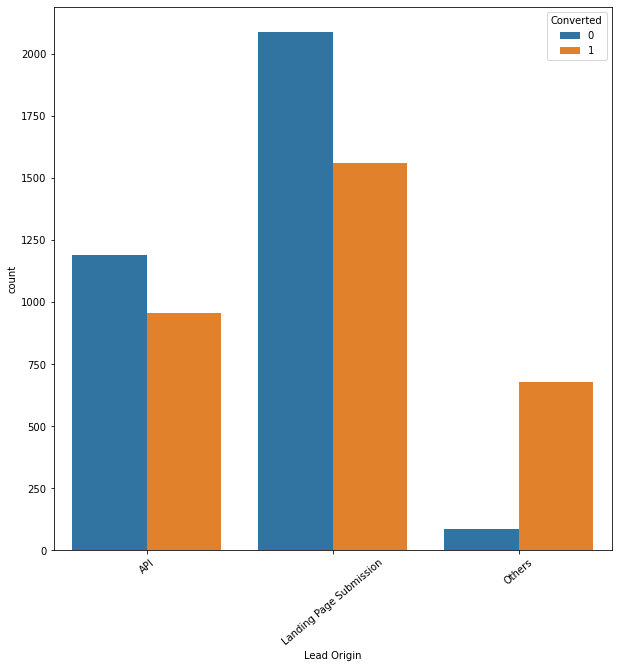

In [90]:
# lead origin vs target variable count plot
plt.figure(figsize=(10,10))
s1=sns.countplot(leads['Lead Origin'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=40)
plt.show()

<i> From the above graph, we notice that the landing page submission and the API have higher conversion rates.Therefore we need to improve on these areas to increase the conversion rate.</i>

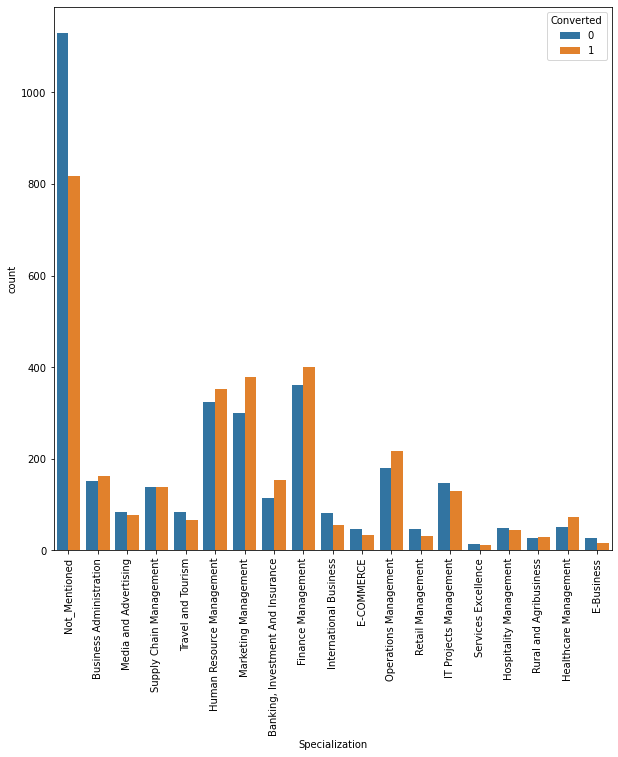

In [91]:
#specialization vs target variable count plot
plt.figure(figsize=(10,10))
s1=sns.countplot(leads['Specialization'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

<i> From the above graph, we can see that people who have not mentioned any specialization are more likely to get converted . This might be due to fact that they are still freshers and want to upskill through this courses. It's also quite interesting see that people from management field has higher rate of conversion.</i>  

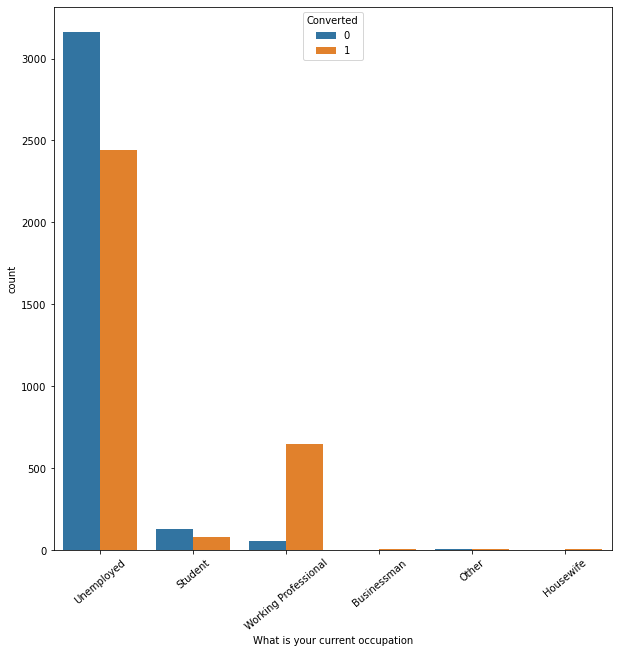

In [92]:
# what is your current occupation vs target variable
plt.figure(figsize=(10,10))
s1=sns.countplot(leads['What is your current occupation'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=40)
plt.show()

<i> From the above graph we can see that unemployed people are more likely to get converted into paying customers,but these are the same people who are more not likely to get converted. This might be due to financial issues.We also see that conversion rate between working professionals is also high because they might want to upskill for their job.</i> 

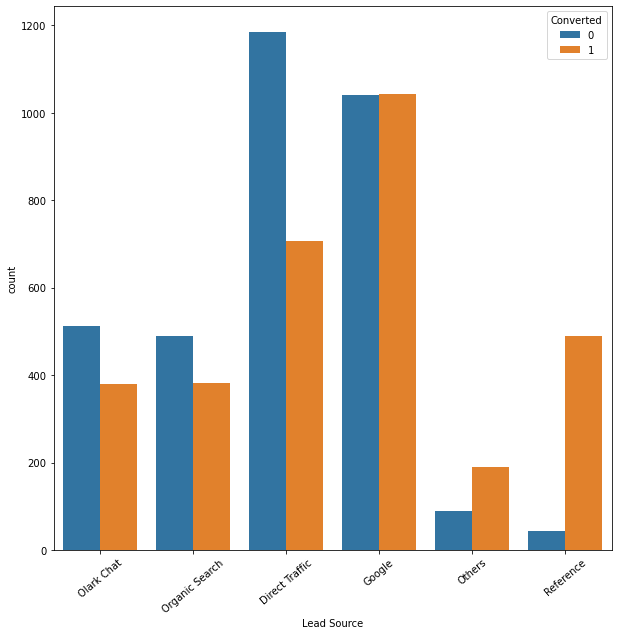

In [93]:
#lead source vs target variable
plt.figure(figsize=(10,10))
s1=sns.countplot(leads['Lead Source'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=40)
plt.show()

<i> From the above graph ,we can see that people who either searched for the website or recommended to them through browser bookmarks have the higher conversion rate. So the company can improve the conversion rate by using digital marketing tools like search engine optimization(SEO).</i> 

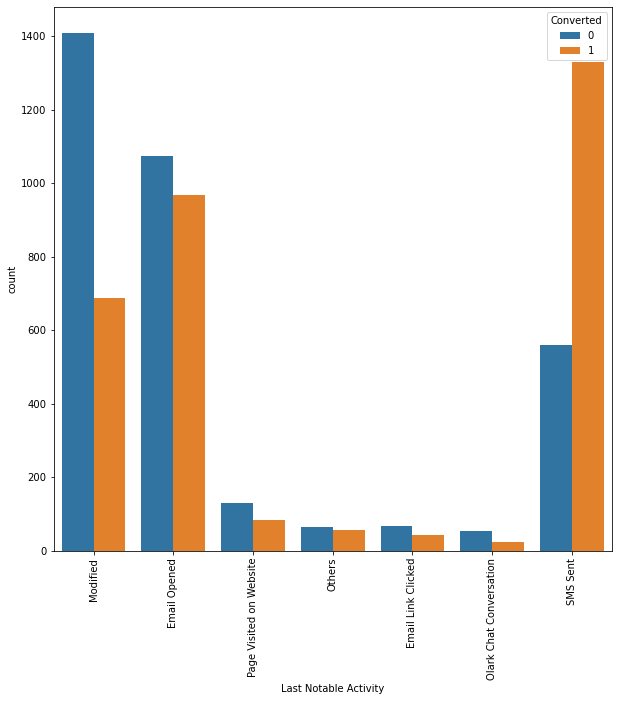

In [94]:
#last notable activity vs target variable
plt.figure(figsize=(10,10))
s1=sns.countplot(leads['Last Notable Activity'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

<i> From the above graph, we can see that customers whose last activity is "email opened" and "modified" have the higher conversion rate.</i> 

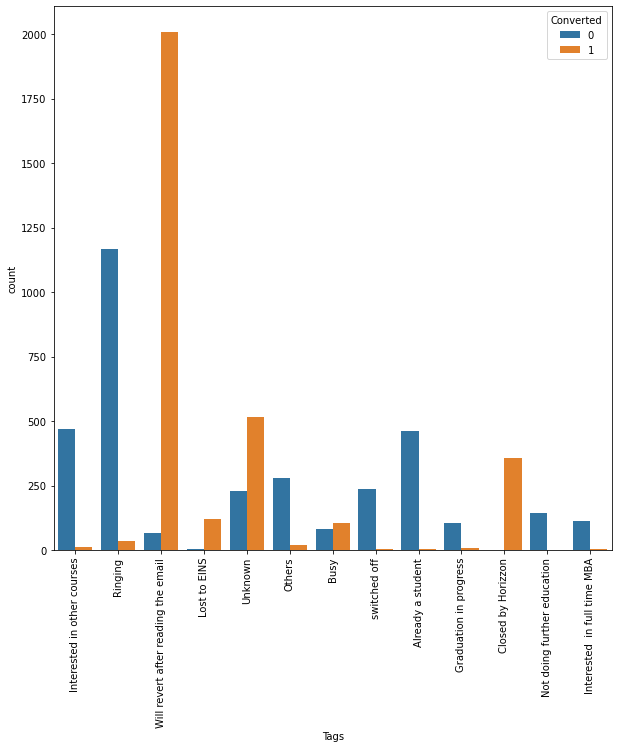

In [95]:
plt.figure(figsize=(10,10))
s1=sns.countplot(leads['Tags'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

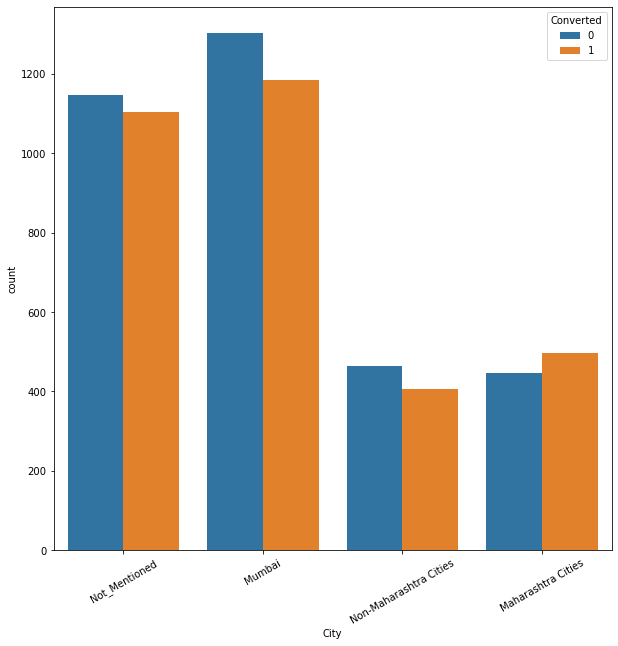

In [96]:
#city vs target variable
plt.figure(figsize=(10,10))
s1=sns.countplot(leads['City'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=30)
plt.show()

<i> From the above graph,we can conclude that the conversion rate does not depend on the city where customer lives.<i>

### 4.2)NUMERICAL VARIABLE ANALYSIS

###### We will now analyze all the numerical variables w.r.t target variable

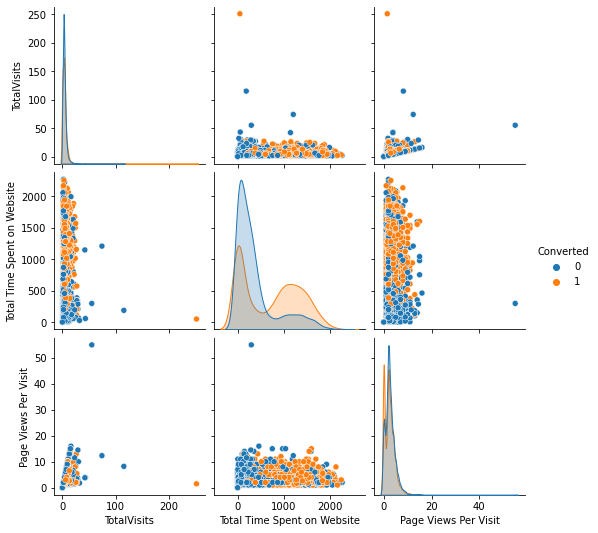

In [97]:
num = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(num,diag_kind='kde',hue='Converted')
plt.show()

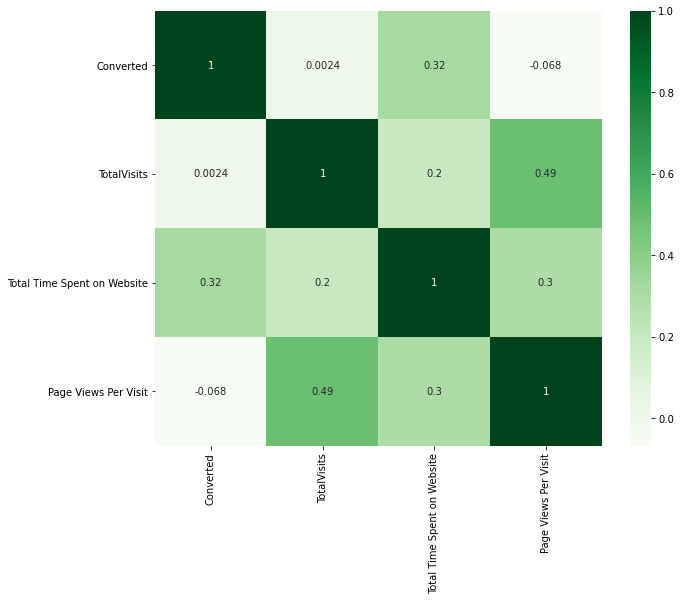

In [98]:
#plotting a heat map to check the correlation between numerical variables
plt.figure(figsize=(10,8))


sns.heatmap(leads.corr(), cmap="Greens", annot=True)
plt.show()

<i> Here we can see that there is high correlation between 'page views per visit' and 'total visits'.</i>

## 5)TREATING THE OUTLIERS

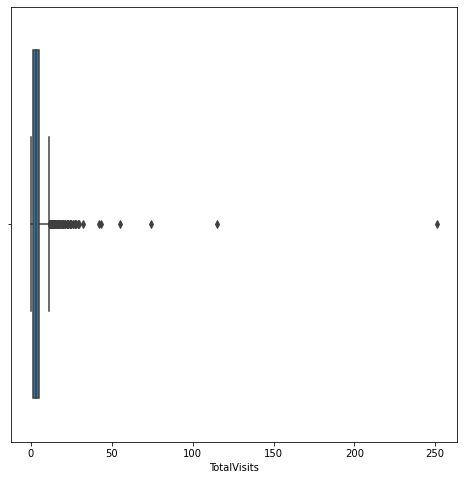

In [99]:
plt.figure(figsize=[8,8])
sns.boxplot(leads["TotalVisits"])
plt.show()

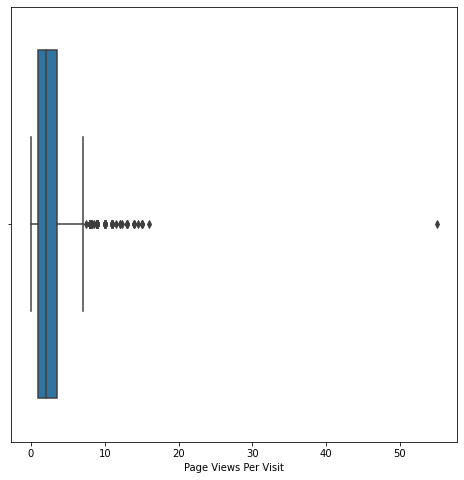

In [100]:
plt.figure(figsize=[8,8])
sns.boxplot(leads["Page Views Per Visit"])
plt.show()

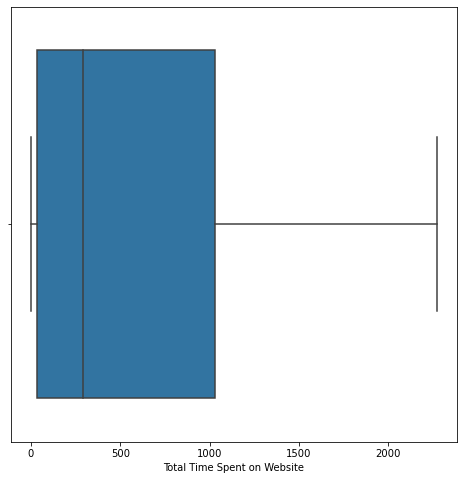

In [101]:
plt.figure(figsize=[8,8])
sns.boxplot(leads["Total Time Spent on Website"])
plt.show()

###### From the above graph we can see that there are outliers with extremely high values which can affect our model.Therefore we treat them by capping them at 99 percentlie.

In [102]:
#capping the values at 99 percentile
leads['TotalVisits'].loc[leads['TotalVisits'] >= leads['TotalVisits'].quantile(0.99)] = leads['TotalVisits'].quantile(0.99)
leads['Page Views Per Visit'].loc[leads['Page Views Per Visit'] >= leads['Page Views Per Visit'].quantile(0.99)] = leads['Page Views Per Visit'].quantile(0.99)

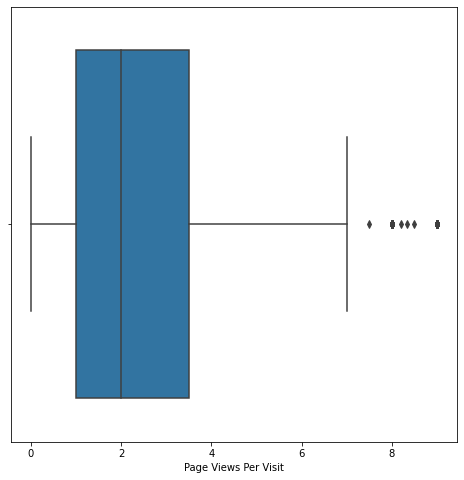

In [103]:
plt.figure(figsize=[8,8])
sns.boxplot(leads["Page Views Per Visit"])
plt.show()

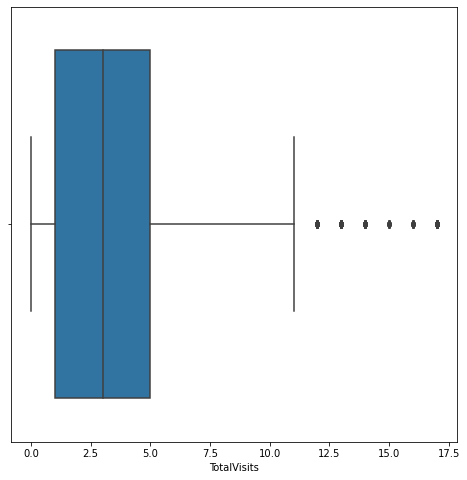

In [104]:
plt.figure(figsize=[8,8])
sns.boxplot(leads["TotalVisits"])
plt.show()

In [105]:
#dropping the do not call column for high data imbalance.
leads.drop(['Do Not Call'],axis=1,inplace=True)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6550 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      6550 non-null   object 
 1   Lead Source                      6550 non-null   object 
 2   Do Not Email                     6550 non-null   object 
 3   Converted                        6550 non-null   int64  
 4   TotalVisits                      6550 non-null   float64
 5   Total Time Spent on Website      6550 non-null   int64  
 6   Page Views Per Visit             6550 non-null   float64
 7   Last Activity                    6550 non-null   object 
 8   Specialization                   6550 non-null   object 
 9   What is your current occupation  6550 non-null   object 
 10  Tags                             6550 non-null   object 
 11  City                             6550 non-null   object 
 12  Last Notable Activit

## 6)IMPORTING THE MODULES FOR MODEL BUILDING

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

## 7)CREATING DUMMY VARIABLES

In [107]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6550 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      6550 non-null   object 
 1   Lead Source                      6550 non-null   object 
 2   Do Not Email                     6550 non-null   object 
 3   Converted                        6550 non-null   int64  
 4   TotalVisits                      6550 non-null   float64
 5   Total Time Spent on Website      6550 non-null   int64  
 6   Page Views Per Visit             6550 non-null   float64
 7   Last Activity                    6550 non-null   object 
 8   Specialization                   6550 non-null   object 
 9   What is your current occupation  6550 non-null   object 
 10  Tags                             6550 non-null   object 
 11  City                             6550 non-null   object 
 12  Last Notable Activit

In [108]:
#Creating dummy variables for categorical variables
dummy_var = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','Specialization', 'City','Tags',
                              'Last Notable Activity']], drop_first=True)
leads = pd.concat([leads, dummy_var], axis=1)

In [109]:
#dropping the unnecessary columns
leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'Tags','City', 'Last Notable Activity'], 1)
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,...,Tags_Ringing,Tags_Unknown,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [110]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6550 entries, 0 to 9239
Data columns (total 64 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             6550 non-null   int64  
 1   TotalVisits                                           6550 non-null   float64
 2   Total Time Spent on Website                           6550 non-null   int64  
 3   Page Views Per Visit                                  6550 non-null   float64
 4   Lead Origin_Landing Page Submission                   6550 non-null   uint8  
 5   Lead Origin_Others                                    6550 non-null   uint8  
 6   Lead Source_Google                                    6550 non-null   uint8  
 7   Lead Source_Olark Chat                                6550 non-null   uint8  
 8   Lead Source_Organic Search                            6550

## 8)SPLITTING THE DATA

In [111]:
#putting all the feature variables into X
X = leads.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,Tags_Ringing,Tags_Unknown,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,2.0,1428,1.0,1,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [112]:
#Putting the target variable into y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [113]:
#splitting the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=300)

## 9)SCALING THE FEATURES

In [114]:
scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,Tags_Ringing,Tags_Unknown,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
2264,0.235294,0.043574,0.444444,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1874,0.000000,0.000000,0.000000,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
8127,0.000000,0.000000,0.000000,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
848,0.176471,0.731514,0.333333,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2136,0.000000,0.000000,0.000000,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## 10)MODEL BUILDING

In [116]:
log_reg = LogisticRegression()

In [117]:
rfe = RFE(log_reg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [118]:
#Features selected by rfe
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 30),
 ('Lead Origin_Others', True, 1),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 22),
 ('Lead Source_Others', False, 2),
 ('Lead Source_Reference', False, 29),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 39),
 ('Last Activity_Email Opened', False, 42),
 ('Last Activity_Form Submitted on Website', False, 28),
 ('Last Activity_Olark Chat Conversation', False, 14),
 ('Last Activity_Others', False, 12),
 ('Last Activity_Page Visited on Website', False, 44),
 ('Last Activity_SMS Sent', True, 1),
 ('What is your current occupation_Housewife', False, 17),
 ('What is your current occupation_Other', False, 21),
 ('What is your current occupation_Student', False, 3),
 ('What is your current occupatio

In [119]:
#here we have created a varuable col and put all variables selected by rfe in it
col = X_train.columns[rfe.support_]

In [120]:
X_train = X_train[col]

### 10.1)MODEL 1

In [121]:
#Fitting a logistic Regression model on X_train
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4564
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -678.11
Date:                Mon, 11 Oct 2021   Deviance:                       1356.2
Time:                        21:14:38   Pearson chi2:                 8.74e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.3091      0.300    -14.365      0.000      -4.897      -3.721
TotalVisits                                       2.1758      0.557      3.908      0.000       1.085       3.267
Total Time Spent on Website                       4.0965      0.353     11.597      0.000       3.404       4.789
Page Views Per Visit                             -1.6486      0.538     -3.067      0.002      -2.702      -0.595
Lead Origin_Others                                1.6885      0.311      5.428      0.000       1.079       2.298
Lead Source_Olark Chat                            0.9773      0.257      3.805      0.000       0.474       1.481
Do Not Email_Yes                                 -0.8198      0.364     -2.249      0.025      -1.534      -0.105
Last Activity_Email Bounced                      -0.9336      0.572     -1.631      0.103      -2.056       0.188
Last Activity_SMS Sent                            1.7286      0.181      9.555      0.000       1.374       2.083
Specialization_Travel and Tourism                -0.9404      0.553     -1.699      0.089      -2.025       0.144
Tags_Busy                                         2.8864      0.292      9.899      0.000       2.315       3.458
Tags_Closed by Horizzon                           8.4440      0.762     11.086      0.000       6.951       9.937
Tags_Interested  in full time MBA               -20.5372   1.29e+04     -0.002      0.999   -2.54e+04    2.53e+04
Tags_Lost to EINS                                 7.4668      0.646     11.558      0.000       6.201       8.733
Tags_Not doing further education                 -0.6886      1.048     -0.657      0.511      -2.742       1.365
Tags_Ringing                                     -1.2710      0.307     -4.145      0.000      -1.872      -0.670
Tags_Unknown                                      3.8843      0.243     15.968      0.000       3.408       4.361
Tags_Will revert after reading the email          6.4085      0.269     23.782      0.000       5.880       6.937
Tags_switched off                                -1.7983      0.639     -2.815      0.005      -3.051      -0.546
Last Notable Activity_Modified                   -1.5782      0.177     -8.928      0.000      -1.925      -1.232
Last Notable Activity_Olark Chat Conversation    -1.6584      0.568     -2.918      0.004      -2.773      -0.544
=================================================================================================================
"""

In [122]:
#creating a vif dataframe
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.32
0,TotalVisits,4.21
16,Tags_Will revert after reading the email,2.83
1,Total Time Spent on Website,2.59
7,Last Activity_SMS Sent,1.82
3,Lead Origin_Others,1.78
5,Do Not Email_Yes,1.69
6,Last Activity_Email Bounced,1.66
14,Tags_Ringing,1.63
18,Last Notable Activity_Modified,1.56


### 10.2)MODEL 2

In [123]:
#Dropping the column "page views per visit" due to high VIF value
X_train.drop(['Page Views Per Visit'], axis = 1, inplace = True)

In [124]:
#refitting the model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4565
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -682.84
Date:                Mon, 11 Oct 2021   Deviance:                       1365.7
Time:                        21:17:40   Pearson chi2:                 9.67e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.5864      0.289    -15.895      0.000      -5.152      -4.021
TotalVisits                                       1.2167      0.467      2.606      0.009       0.302       2.132
Total Time Spent on Website                       4.0571      0.351     11.557      0.000       3.369       4.745
Lead Origin_Others                                1.9598      0.297      6.590      0.000       1.377       2.543
Lead Source_Olark Chat                            1.2593      0.239      5.278      0.000       0.792       1.727
Do Not Email_Yes                                 -0.8304      0.358     -2.318      0.020      -1.533      -0.128
Last Activity_Email Bounced                      -0.9224      0.573     -1.611      0.107      -2.045       0.200
Last Activity_SMS Sent                            1.6905      0.179      9.434      0.000       1.339       2.042
Specialization_Travel and Tourism                -1.0497      0.548     -1.915      0.056      -2.124       0.025
Tags_Busy                                         2.8501      0.291      9.798      0.000       2.280       3.420
Tags_Closed by Horizzon                           8.4202      0.759     11.089      0.000       6.932       9.908
Tags_Interested  in full time MBA               -20.5656   1.29e+04     -0.002      0.999   -2.54e+04    2.53e+04
Tags_Lost to EINS                                 7.4883      0.646     11.594      0.000       6.222       8.754
Tags_Not doing further education                 -0.6213      1.044     -0.595      0.552      -2.668       1.425
Tags_Ringing                                     -1.2923      0.306     -4.217      0.000      -1.893      -0.692
Tags_Unknown                                      3.8846      0.243     16.006      0.000       3.409       4.360
Tags_Will revert after reading the email          6.3537      0.268     23.748      0.000       5.829       6.878
Tags_switched off                                -1.7843      0.637     -2.800      0.005      -3.033      -0.535
Last Notable Activity_Modified                   -1.5769      0.176     -8.973      0.000      -1.921      -1.232
Last Notable Activity_Olark Chat Conversation    -1.5877      0.552     -2.878      0.004      -2.669      -0.507
=================================================================================================================
"""

In [125]:
#creating a  vif dataframe
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Tags_Will revert after reading the email,2.71
1,Total Time Spent on Website,2.54
0,TotalVisits,2.44
6,Last Activity_SMS Sent,1.79
2,Lead Origin_Others,1.73
4,Do Not Email_Yes,1.69
5,Last Activity_Email Bounced,1.66
9,Tags_Closed by Horizzon,1.55
14,Tags_Unknown,1.53
13,Tags_Ringing,1.51


### 10.3)MODEL 3

In [126]:
#dropping the 'Tags_Interested  in full time MBA' column due to high p-value
X_train.drop(["Tags_Interested  in full time MBA"],axis=1,inplace=True)

In [127]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4585 entries, 2264 to 1771
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   TotalVisits                                    4585 non-null   float64
 1   Total Time Spent on Website                    4585 non-null   float64
 2   Lead Origin_Others                             4585 non-null   uint8  
 3   Lead Source_Olark Chat                         4585 non-null   uint8  
 4   Do Not Email_Yes                               4585 non-null   uint8  
 5   Last Activity_Email Bounced                    4585 non-null   uint8  
 6   Last Activity_SMS Sent                         4585 non-null   uint8  
 7   Specialization_Travel and Tourism              4585 non-null   uint8  
 8   Tags_Busy                                      4585 non-null   uint8  
 9   Tags_Closed by Horizzon                        45

In [128]:
#refitting the model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4566
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -684.58
Date:                Mon, 11 Oct 2021   Deviance:                       1369.2
Time:                        21:18:26   Pearson chi2:                 9.79e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.6590      0.288    -16.198      0.000      -5.223      -4.095
TotalVisits                                       1.2225      0.468      2.614      0.009       0.306       2.139
Total Time Spent on Website                       4.0603      0.351     11.578      0.000       3.373       4.748
Lead Origin_Others                                1.9559      0.296      6.599      0.000       1.375       2.537
Lead Source_Olark Chat                            1.2668      0.239      5.302      0.000       0.799       1.735
Do Not Email_Yes                                 -0.8259      0.359     -2.298      0.022      -1.530      -0.122
Last Activity_Email Bounced                      -0.9204      0.573     -1.606      0.108      -2.044       0.203
Last Activity_SMS Sent                            1.7038      0.180      9.486      0.000       1.352       2.056
Specialization_Travel and Tourism                -1.0531      0.548     -1.922      0.055      -2.127       0.021
Tags_Busy                                         2.9138      0.290     10.031      0.000       2.344       3.483
Tags_Closed by Horizzon                           8.4961      0.759     11.198      0.000       7.009       9.983
Tags_Lost to EINS                                 7.5617      0.645     11.716      0.000       6.297       8.827
Tags_Not doing further education                 -0.5538      1.044     -0.530      0.596      -2.600       1.492
Tags_Ringing                                     -1.2326      0.306     -4.024      0.000      -1.833      -0.632
Tags_Unknown                                      3.9515      0.242     16.332      0.000       3.477       4.426
Tags_Will revert after reading the email          6.4249      0.267     24.108      0.000       5.903       6.947
Tags_switched off                                -1.7263      0.637     -2.708      0.007      -2.976      -0.477
Last Notable Activity_Modified                   -1.5827      0.176     -9.018      0.000      -1.927      -1.239
Last Notable Activity_Olark Chat Conversation    -1.5873      0.552     -2.877      0.004      -2.669      -0.506
=================================================================================================================
"""

### 10.4)MODEL 4

In [129]:
#dropping 'Tags_Not doing further education' column due to high p-value
X_train.drop(['Tags_Not doing further education'],axis=1,inplace=True)

In [130]:
#refit the model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4567
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -684.74
Date:                Mon, 11 Oct 2021   Deviance:                       1369.5
Time:                        21:20:21   Pearson chi2:                 9.76e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.6841      0.285    -16.431      0.000      -5.243      -4.125
TotalVisits                                       1.2113      0.466      2.600      0.009       0.298       2.124
Total Time Spent on Website                       4.0655      0.351     11.594      0.000       3.378       4.753
Lead Origin_Others                                1.9560      0.296      6.601      0.000       1.375       2.537
Lead Source_Olark Chat                            1.2684      0.239      5.309      0.000       0.800       1.737
Do Not Email_Yes                                 -0.8363      0.358     -2.337      0.019      -1.538      -0.135
Last Activity_Email Bounced                      -0.9174      0.572     -1.604      0.109      -2.038       0.204
Last Activity_SMS Sent                            1.7068      0.180      9.502      0.000       1.355       2.059
Specialization_Travel and Tourism                -1.0514      0.548     -1.917      0.055      -2.126       0.023
Tags_Busy                                         2.9393      0.288     10.209      0.000       2.375       3.504
Tags_Closed by Horizzon                           8.5232      0.758     11.250      0.000       7.038      10.008
Tags_Lost to EINS                                 7.5880      0.644     11.779      0.000       6.325       8.851
Tags_Ringing                                     -1.2084      0.304     -3.974      0.000      -1.804      -0.612
Tags_Unknown                                      3.9771      0.239     16.654      0.000       3.509       4.445
Tags_Will revert after reading the email          6.4513      0.263     24.489      0.000       5.935       6.968
Tags_switched off                                -1.7015      0.636     -2.674      0.007      -2.949      -0.454
Last Notable Activity_Modified                   -1.5838      0.175     -9.027      0.000      -1.928      -1.240
Last Notable Activity_Olark Chat Conversation    -1.5843      0.552     -2.871      0.004      -2.666      -0.503
=================================================================================================================
"""

### 10.5)MODEL 5

In [131]:
#Dropping 'Last Activity_Email Bounced' due to high p-value
X_train.drop(['Last Activity_Email Bounced'],axis=1,inplace=True)

In [132]:
#refitting the model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4568
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -686.06
Date:                Mon, 11 Oct 2021   Deviance:                       1372.1
Time:                        21:20:27   Pearson chi2:                 8.54e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.6919      0.285    -16.436      0.000      -5.251      -4.132
TotalVisits                                       1.2663      0.467      2.713      0.007       0.352       2.181
Total Time Spent on Website                       4.0458      0.351     11.529      0.000       3.358       4.734
Lead Origin_Others                                1.9627      0.296      6.641      0.000       1.383       2.542
Lead Source_Olark Chat                            1.2728      0.239      5.332      0.000       0.805       1.741
Do Not Email_Yes                                 -1.1713      0.292     -4.009      0.000      -1.744      -0.599
Last Activity_SMS Sent                            1.7562      0.178      9.886      0.000       1.408       2.104
Specialization_Travel and Tourism                -1.0609      0.547     -1.941      0.052      -2.133       0.011
Tags_Busy                                         2.9322      0.289     10.154      0.000       2.366       3.498
Tags_Closed by Horizzon                           8.5185      0.758     11.244      0.000       7.034      10.003
Tags_Lost to EINS                                 7.6027      0.644     11.798      0.000       6.340       8.866
Tags_Ringing                                     -1.2365      0.304     -4.063      0.000      -1.833      -0.640
Tags_Unknown                                      3.9606      0.239     16.595      0.000       3.493       4.428
Tags_Will revert after reading the email          6.4432      0.263     24.481      0.000       5.927       6.959
Tags_switched off                                -1.7106      0.636     -2.688      0.007      -2.958      -0.463
Last Notable Activity_Modified                   -1.6043      0.175     -9.182      0.000      -1.947      -1.262
Last Notable Activity_Olark Chat Conversation    -1.5479      0.552     -2.805      0.005      -2.630      -0.466
=================================================================================================================
"""

### 10.6)MODEL 6

In [133]:
#Dropping 'Specialization_Travel and Tourism' due to its high p-value
X_train.drop(['Specialization_Travel and Tourism'],axis=1,inplace=True)

In [134]:
#refitting the model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4569
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -687.81
Date:                Mon, 11 Oct 2021   Deviance:                       1375.6
Time:                        21:21:07   Pearson chi2:                 8.52e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.6853      0.284    -16.477      0.000      -5.243      -4.128
TotalVisits                                       1.1845      0.463      2.556      0.011       0.276       2.093
Total Time Spent on Website                       4.0551      0.351     11.558      0.000       3.367       4.743
Lead Origin_Others                                1.9746      0.295      6.701      0.000       1.397       2.552
Lead Source_Olark Chat                            1.2771      0.238      5.362      0.000       0.810       1.744
Do Not Email_Yes                                 -1.1655      0.291     -4.007      0.000      -1.736      -0.595
Last Activity_SMS Sent                            1.7415      0.177      9.843      0.000       1.395       2.088
Tags_Busy                                         2.9328      0.289     10.156      0.000       2.367       3.499
Tags_Closed by Horizzon                           8.5106      0.757     11.236      0.000       7.026       9.995
Tags_Lost to EINS                                 7.6139      0.644     11.817      0.000       6.351       8.877
Tags_Ringing                                     -1.2208      0.304     -4.021      0.000      -1.816      -0.626
Tags_Unknown                                      3.9575      0.238     16.616      0.000       3.491       4.424
Tags_Will revert after reading the email          6.4142      0.261     24.532      0.000       5.902       6.927
Tags_switched off                                -1.7315      0.636     -2.723      0.006      -2.978      -0.485
Last Notable Activity_Modified                   -1.6138      0.174     -9.252      0.000      -1.956      -1.272
Last Notable Activity_Olark Chat Conversation    -1.5340      0.549     -2.793      0.005      -2.611      -0.457
=================================================================================================================
"""

###### Now we see that all p-values are below 0.05. So lets create vif dataframe to make sure that VIF values are below 5.

In [135]:
#creating a new vif dataframe 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_Will revert after reading the email,2.64
1,Total Time Spent on Website,2.53
0,TotalVisits,2.35
5,Last Activity_SMS Sent,1.76
2,Lead Origin_Others,1.72
7,Tags_Closed by Horizzon,1.52
10,Tags_Unknown,1.49
9,Tags_Ringing,1.47
13,Last Notable Activity_Modified,1.42
3,Lead Source_Olark Chat,1.36


## 11)MODEL EVALUATION

In [136]:
# Using 'predict' to predict the probabilities on the train set
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

2264    0.236968
1874    0.633973
8127    0.001941
848     0.964102
2136    0.006548
7908    0.350638
6464    0.005310
8719    0.940798
4204    0.470372
6592    0.783800
dtype: float64

In [137]:
#reshaping the array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.23696814, 0.63397253, 0.00194063, 0.96410175, 0.006548  ,
       0.35063841, 0.00531003, 0.94079805, 0.47037155, 0.78380016])

In [138]:
#creating the data frame with actual conversion flag and each individual probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.236968
1,1,0.633973
2,0,0.001941
3,1,0.964102
4,0,0.006548


In [139]:
# lets see predicted values
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.236968,0
1,1,0.633973,1
2,0,0.001941,0
3,1,0.964102,1
4,0,0.006548,0


Creating confusion matrix

In [140]:
#creating confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[2189  135]
 [  93 2168]]


In [141]:
#calculate accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9502726281352235


In [142]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

In [143]:
#calculate sensitivity
TP/(TP+FN)

0.9588677576293675

In [144]:
 #calculate specificity
TN/(TN+FP)

0.9419104991394148

#### Plotting of ROC curve to find optimal cutoff

In [145]:
def roc_curve_draw( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [146]:
# plotting of ROC curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )


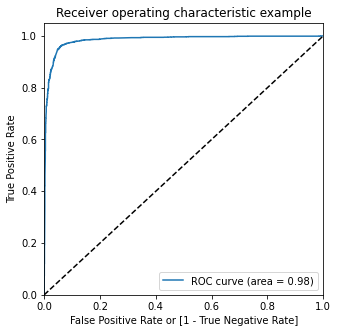

In [147]:
roc_curve_draw(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### Finding optimal cuttoff point

Optimal cuttoff probability is that probability where we get balanced sensitivity & specificity

In [148]:
# creating columns with diffrent probability cuttoffs
n = [float(x)/10 for x in range(10)]
for i in n:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.236968,0,1,1,1,0,0,0,0,0,0,0
1,1,0.633973,1,1,1,1,1,1,1,1,0,0,0
2,0,0.001941,0,1,0,0,0,0,0,0,0,0,0
3,1,0.964102,1,1,1,1,1,1,1,1,1,1,1
4,0,0.006548,0,1,0,0,0,0,0,0,0,0,0


In [149]:
#calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.493130  1.000000  0.000000
0.1   0.1  0.912323  0.984962  0.841652
0.2   0.2  0.932606  0.978770  0.887694
0.3   0.3  0.945692  0.970809  0.921256
0.4   0.4  0.948746  0.965502  0.932444
0.5   0.5  0.950273  0.958868  0.941910
0.6   0.6  0.949400  0.948695  0.950086
0.7   0.7  0.938059  0.910659  0.964716
0.8   0.8  0.925627  0.879257  0.970740
0.9   0.9  0.904689  0.823529  0.983649


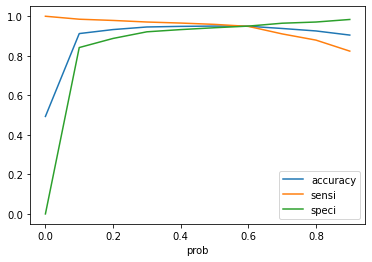

In [150]:
#plot accuracy, sensitivity, specificity for various variables
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the graph we can observe that threshold value is around 0.57

In [152]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.57 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.236968,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.633973,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.001941,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.964102,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.006548,0,1,0,0,0,0,0,0,0,0,0,0


In [153]:
#Check overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9491821155943293

In [154]:
confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_2

array([[2201,  123],
       [ 110, 2151]], dtype=int64)

In [156]:
#calculating true positive , true negative etc
TP = confusion_2[1,1]  
TN = confusion_2[0,0] 
FP = confusion_2[0,1] 
FN = confusion_2[1,0]

In [157]:
# check Sensitivity
TP/(TP+FN)

0.9513489606368863

In [158]:
#check Specificity

TN/(TN+FP)

0.9470740103270223

## 12. Making predictions on test test

In [159]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [160]:
#select the column in X_train for x_test
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Others,Lead Source_Olark Chat,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_SMS Sent,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Unknown,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
5461,0.176471,0.496039,0.333333,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1351,0.235294,0.141725,0.444444,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6448,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1438,0.470588,0.184419,0.888889,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1990,0.235294,0.018046,0.222222,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [161]:
# add constant to x_test
X_test_sm = sm.add_constant(X_test[col])

In [162]:
# Check X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Others,Lead Source_Olark Chat,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_SMS Sent,Specialization_Travel and Tourism,...,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Unknown,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
5461,1.0,0.176471,0.496039,0.333333,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1351,1.0,0.235294,0.141725,0.444444,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6448,1.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1438,1.0,0.470588,0.184419,0.888889,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1990,1.0,0.235294,0.018046,0.222222,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3408,1.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3298,1.0,0.176471,0.212148,0.333333,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7263,1.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9043,1.0,0.117647,0.082306,0.222222,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [163]:
# Drop the required columns from X_test
X_test.drop(['Page Views Per Visit', 'Tags_Interested  in full time MBA', 
             'Tags_Not doing further education', 'Last Activity_Email Bounced','Specialization_Travel and Tourism'], 1, inplace = True)

In [164]:
# Make predictions on the test set 
y_test_pred = res.predict(sm.add_constant(X_test))

In [165]:
y_test_pred[:10]

5461    0.996635
1351    0.021420
6448    0.032040
1438    0.032926
1990    0.889025
60      0.003540
8776    0.985023
4703    0.985975
4270    0.000898
7581    0.001498
dtype: float64

In [166]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [167]:
y_pred_1.head()

,0
5461,0.996635
1351,0.021420
6448,0.032040
1438,0.032926
1990,0.889025


In [168]:
#Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,0
0,1,0.996635
1,0,0.021420
2,0,0.032040
3,0,0.032926
4,1,0.889025


In [169]:
#rename the column to from 0 to conversion prob
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996635
1,0,0.021420
2,0,0.032040
3,0,0.032926
4,1,0.889025


In [170]:
# Make predictions on the test set
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.57 else 0)

In [171]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996635,1
1,0,0.021420,0
2,0,0.032040,0
3,0,0.032926,0
4,1,0.889025,1


In [172]:
#overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.9526717557251908

In [173]:
confusion_2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion_2

array([[987,  48],
       [ 45, 885]], dtype=int64)

In [174]:
TP = confusion_2[1,1]  
TN = confusion_2[0,0] 
FP = confusion_2[0,1] 
FN = confusion_2[1,0]

In [176]:
#calculate sensitivity
TP / float(TP+FN)

0.9516129032258065

In [177]:
#calculate specificity
TN / float(TN+FP)

0.9536231884057971

#### precision-recall view

In [178]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[2189,  135],
       [  93, 2168]], dtype=int64)

In [179]:
#precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9413808076422058

In [180]:
#recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9588677576293675

#### precision recall trade-off

In [182]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       1
 2       0
 3       1
 4       0
        ..
 4580    0
 4581    0
 4582    0
 4583    1
 4584    1
 Name: Converted, Length: 4585, dtype: int64,
 0       0
 1       1
 2       0
 3       1
 4       0
        ..
 4580    0
 4581    0
 4582    0
 4583    1
 4584    1
 Name: Predicted, Length: 4585, dtype: int64)

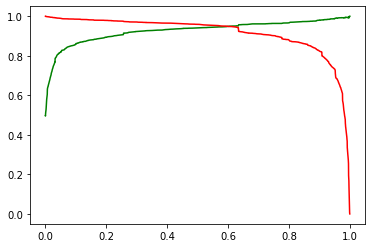

In [183]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [184]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.60 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.236968,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.633973,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.001941,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.964102,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.006548,0,1,0,0,0,0,0,0,0,0,0,0


In [185]:
#Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9494002181025082

In [186]:
confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_2

array([[2208,  116],
       [ 116, 2145]], dtype=int64)

In [187]:
TP = confusion_2[1,1]  
TN = confusion_2[0,0] 
FP = confusion_2[0,1] 
FN = confusion_2[1,0]

In [188]:
# Calculate Precision

TP/(TP+FP)

0.9486952675807165

In [189]:
# Calculate Recall

TP/(TP+FN)

0.9486952675807165

### Making Predictions on test set

In [190]:
# Make predictions on the test set
y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred[:10]

5461    0.996635
1351    0.021420
6448    0.032040
1438    0.032926
1990    0.889025
60      0.003540
8776    0.985023
4703    0.985975
4270    0.000898
7581    0.001498
dtype: float64

In [191]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
5461,0.996635
1351,0.021420
6448,0.032040
1438,0.032926
1990,0.889025


In [192]:
#Convert y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,Converted,0
0,1,0.996635
1,0,0.021420
2,0,0.032040
3,0,0.032926
4,1,0.889025


In [193]:
#Rename the column
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996635
1,0,0.021420
2,0,0.032040
3,0,0.032926
4,1,0.889025


In [194]:
# Make predictions on the test set using 0.60 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.60 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996635,1
1,0,0.021420,0
2,0,0.032040,0
3,0,0.032926,0
4,1,0.889025,1


In [195]:
#check accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.9521628498727736

In [196]:
confusion_2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion_2

array([[989,  46],
       [ 48, 882]], dtype=int64)

In [197]:
TP = confusion_2[1,1]  
TN = confusion_2[0,0] 
FP = confusion_2[0,1] 
FN = confusion_2[1,0]

In [198]:
# Calculate Precision

TP/(TP+FP)

0.9504310344827587

In [199]:
# Calculate Recall

TP/(TP+FN)

0.9483870967741935

#### Conclusion
In order to achieve higher conversion rate company should target people who
1.Unemployed/Freshers & Working Professional
2.Have given contact information
3.They where Lead Source from google & Spend lot of time on website